In [1]:
# Standard library
from pathlib import Path
import sys

# Add src/ to path so we can import our modules
sys.path.append(str(Path.cwd().parent / "src"))

# Third-party imports
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.typing import NDArray

# Jupyter settings
%matplotlib inline
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

print("✅ All imports successful!")
print(f"📁 Working directory: {Path.cwd()}")

✅ All imports successful!
📁 Working directory: c:\Users\victo\OneDrive\TADS\5_Semestre\InteligenciaArtificial\Trabalho\comment-classfier\notebooks


In [4]:
def load_project_data() -> tuple[
    list[str],                    # Vocabulary words
    NDArray[np.float32],          # Word embeddings (9538 × 100)
    NDArray[np.float32],          # Text vectors (10400 × 100)
    NDArray[np.int32]             # Labels (10400,)
]:
    """
    Load all project data from the resources directory.
    
    Returns:
        vocabulary: List of 9,538 words
        word_embeddings: Word vectors (9538 rows, 100 columns)
        text_embeddings: Pre-computed text vectors (10400 rows, 100 columns)
        labels: Binary labels (1=positive, 0=negative)
    """
    # Navigate from notebooks/ to resources/
    resources = Path.cwd().parent / "resources"
    
    print(f"📂 Loading data from: {resources}")
    
    # Load vocabulary (one word per line)
    with open(resources / "PALAVRASpc.txt", "r", encoding="utf-8") as f:
        vocabulary = [line.strip() for line in f]
    
    # Load word embeddings (9538 × 100)
    word_embeddings = np.loadtxt(
        resources / "WWRDpc.dat",
        dtype=np.float32
    )
    
    # Load pre-computed text vectors (10400 × 100)
    text_embeddings = np.loadtxt(
        resources / "WTEXpc.dat",
        dtype=np.float32
    )
    
    # Load labels (10400 values: 0 or 1)
    labels = np.loadtxt(
        resources / "CLtx.dat",
        dtype=np.float32
    ).astype(np.int32)
    
    print("✅ Data loaded successfully!")
    return vocabulary, word_embeddings, text_embeddings, labels

# Execute the function
vocabulary, word_embeddings, text_embeddings, labels = load_project_data()

📂 Loading data from: c:\Users\victo\OneDrive\TADS\5_Semestre\InteligenciaArtificial\Trabalho\comment-classfier\resources
✅ Data loaded successfully!


In [5]:
print("=" * 60)
print("📊 DATASET OVERVIEW")
print("=" * 60)

print(f"\n🔤 Vocabulary:")
print(f"   Total words: {len(vocabulary):,}")
print(f"   First 10 words: {vocabulary[:10]}")

print(f"\n📐 Word Embeddings Shape: {word_embeddings.shape}")
print(f"   Each word → {word_embeddings.shape[1]} dimensions")

print(f"\n📝 Text Embeddings Shape: {text_embeddings.shape}")
print(f"   Total comments: {text_embeddings.shape[0]:,}")

print(f"\n🏷️  Labels:")
print(f"   Total: {len(labels):,}")
print(f"   Positive (1): {np.sum(labels == 1):,} ({np.sum(labels == 1) / len(labels) * 100:.1f}%)")
print(f"   Negative (0): {np.sum(labels == 0):,} ({np.sum(labels == 0) / len(labels) * 100:.1f}%)")

📊 DATASET OVERVIEW

🔤 Vocabulary:
   Total words: 9,538
   First 10 words: ['IMENSA', 'TOA', 'SABENDO', 'SABEMOS', 'NISTO', 'SABERMOS', 'SABEREMOS', 'SABEREM', 'SABERIAMOS', 'SABERIA']

📐 Word Embeddings Shape: (9538, 100)
   Each word → 100 dimensions

📝 Text Embeddings Shape: (10400, 100)
   Total comments: 10,400

🏷️  Labels:
   Total: 10,400
   Positive (1): 3,440 (33.1%)
   Negative (0): 6,960 (66.9%)


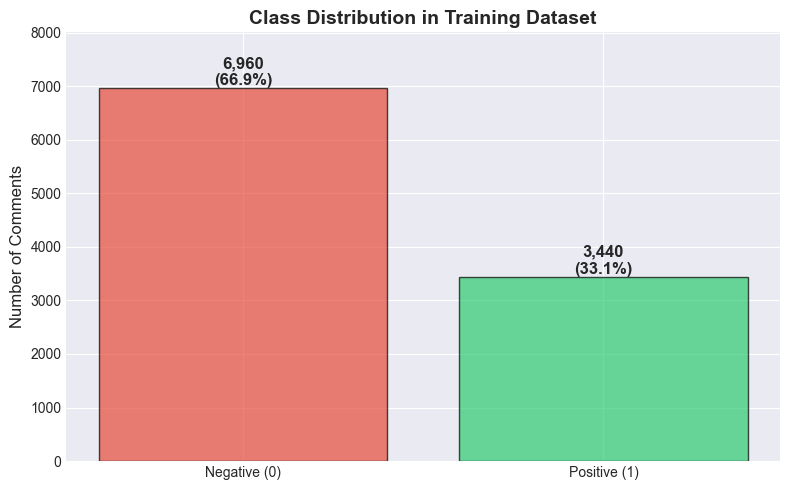

⚠️  Dataset is imbalanced (ratio: 0.49)
   Consider using stratified splitting or class weights.


In [6]:
# Create a bar plot of class distribution
fig, ax = plt.subplots(figsize=(8, 5))

class_counts = [np.sum(labels == 0), np.sum(labels == 1)]
class_names = ['Negative (0)', 'Positive (1)']
colors = ['#e74c3c', '#2ecc71']

bars = ax.bar(class_names, class_counts, color=colors, alpha=0.7, edgecolor='black')

# Add value labels on bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{int(height):,}\n({height/len(labels)*100:.1f}%)',
            ha='center', va='bottom', fontsize=12, fontweight='bold')

ax.set_ylabel('Number of Comments', fontsize=12)
ax.set_title('Class Distribution in Training Dataset', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(class_counts) * 1.15)
plt.tight_layout()
plt.show()

# Check if dataset is balanced
balance_ratio = min(class_counts) / max(class_counts)
if balance_ratio > 0.8:
    print("✅ Dataset is well-balanced! No special handling needed.")
else:
    print(f"⚠️  Dataset is imbalanced (ratio: {balance_ratio:.2f})")
    print("   Consider using stratified splitting or class weights.")